<a href="https://colab.research.google.com/github/anandbrjcp/PGDSBA/blob/main/AirBNB_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style

In [96]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

df =  pd.read_csv(io.BytesIO(uploaded['AirBNB.csv']))


<ipython-input-96-b9cfd8c63b31>:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv(io.BytesIO(uploaded['AirBNB.csv']))


In [97]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [98]:
df.drop(columns='id', inplace=True)

In [99]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [101]:
df.isna().sum()[df.isna().sum()> 0]

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
review_scores_rating    16722
bedrooms                   92
beds                      131
dtype: int64

In [102]:
df.describe(include='all')

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


In [103]:
for column in df.columns:
  if df[column].dtype == 'object':
    print(df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

3
room_type
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: count, dtype: int64


3
cancellation_policy
moderate    19060
flexible    22543
strict      32500
Name: count, dtype: int64


2
cleaning_fee
False    19708
True     54399
Name: count, dtype: int64


2
instant_bookable
t    19451
f    54660
Name: count, dtype: int64




In [104]:
df.instant_bookable.replace({'t': True, 'f': False}, inplace=True)

In [105]:
df.instant_bookable.value_counts()

instant_bookable
False    54660
True     19451
Name: count, dtype: int64

In [106]:
df.instant_bookable = df.instant_bookable.astype('object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [108]:
df = pd.get_dummies(df, columns=['room_type', 'cancellation_policy', 'cleaning_fee', 'instant_bookable'], drop_first= True, dtype='int')

In [109]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,NaN,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.0,0.0,1.0,4.744932,0,0,1,0,1,1


In [110]:
df.isna().sum()[df.isna().sum()> 0]

accommodates                3
bathrooms                 203
review_scores_rating    16722
bedrooms                   92
beds                      131
dtype: int64

In [111]:
medianfiller = lambda x: x.fillna(x.median())

df = df.apply(medianfiller, axis = 0)

In [112]:
df.isna().sum()[df.isna().sum()> 0]

Series([], dtype: int64)

In [113]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,96.0,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.0,0.0,1.0,4.744932,0,0,1,0,1,1


In [114]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155078,1.234628,94.503434,1.265467,1.709611,4.782069,0.413366,0.029186,0.257182,0.438531,0.734021,0.262458
std,2.153572,0.581386,6.943159,0.851671,1.253389,0.717394,0.492441,0.168329,0.437083,0.496211,0.441856,0.439973
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
df.duplicated().sum()

21145

In [116]:
df.shape

(74111, 12)

In [117]:
df.drop_duplicates(inplace=True)

In [118]:
df.duplicated().sum()

0

In [119]:
df.shape

(52966, 12)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52966 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  52966 non-null  float64
 1   bathrooms                     52966 non-null  float64
 2   review_scores_rating          52966 non-null  float64
 3   bedrooms                      52966 non-null  float64
 4   beds                          52966 non-null  float64
 5   log_price                     52966 non-null  float64
 6   room_type_Private room        52966 non-null  int64  
 7   room_type_Shared room         52966 non-null  int64  
 8   cancellation_policy_moderate  52966 non-null  int64  
 9   cancellation_policy_strict    52966 non-null  int64  
 10  cleaning_fee_True             52966 non-null  int64  
 11  instant_bookable_True         52966 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 5.3 MB


In [121]:
nums, cat = [], []
for column in df.columns:
  if df[column].dtype == 'int64':
    cat.append(column)
  else:
    nums.append(column)

In [122]:
print(nums)
print(cat)

['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds', 'log_price']
['room_type_Private room', 'room_type_Shared room', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'cleaning_fee_True', 'instant_bookable_True']


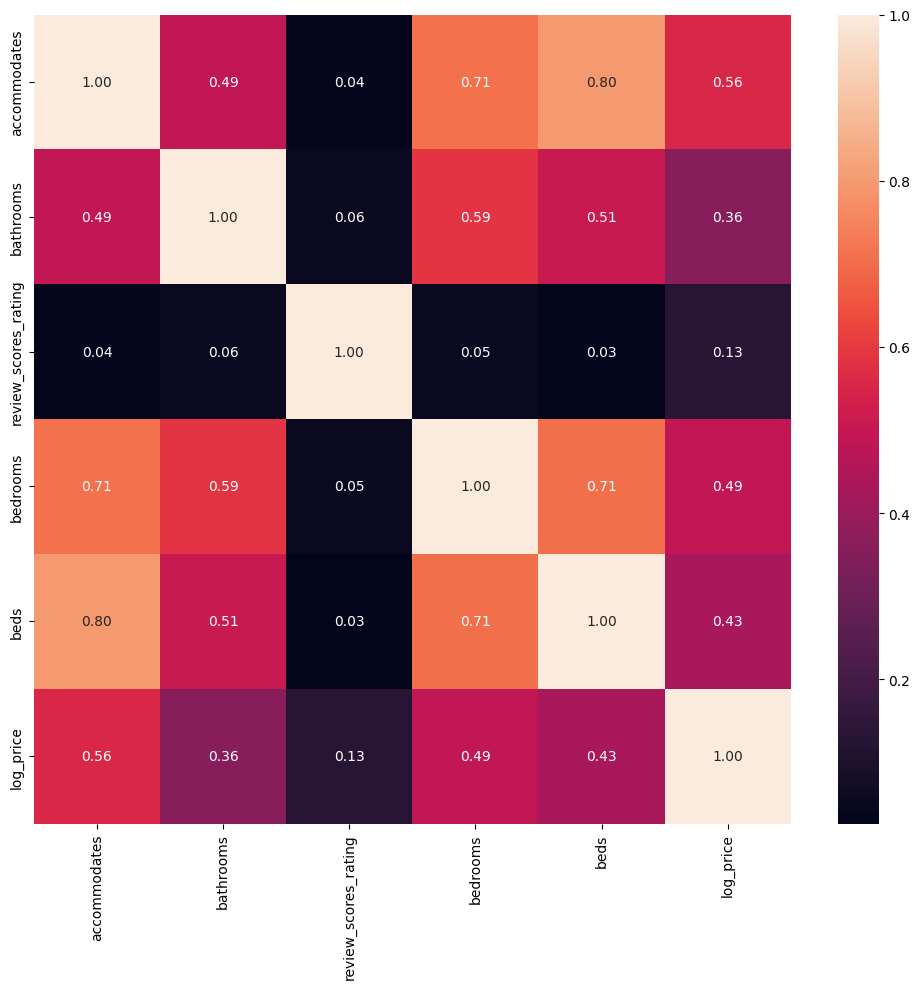

In [123]:
plt.figure(figsize=(10,10))
sns.heatmap(data= df[nums].corr(), annot= True, fmt='.2f')
plt.tight_layout()
plt.show()

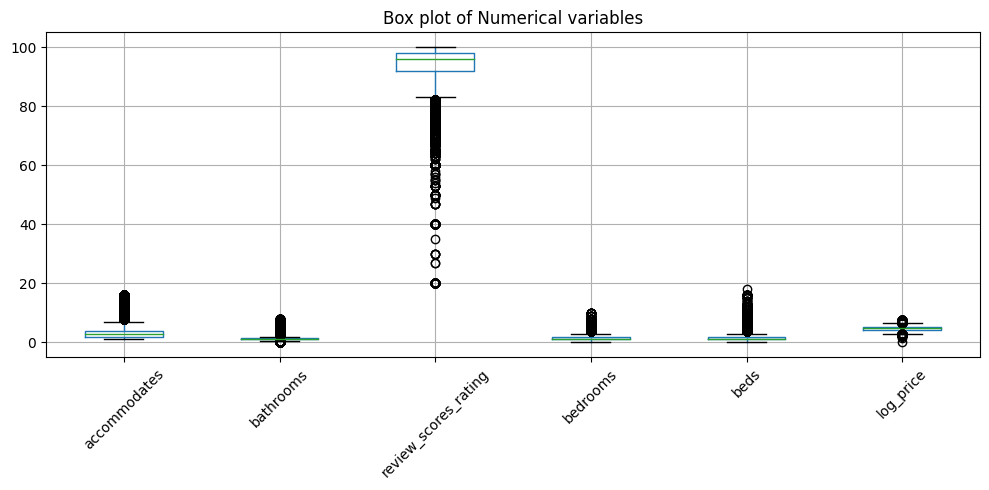

In [124]:
df[nums].boxplot(figsize=(10,5))
plt.xticks(rotation = 45)
plt.title('Box plot of Numerical variables')
plt.tight_layout()
plt.show()

In [125]:
x,y = df['bathrooms'].quantile([0.25, 0.75])
print(x,y)

1.0 1.5


In [126]:
def remove_outliers(col):
  q1, q3 = df[col].quantile([0.25, 0.75])
  iqr = q3 - q1
  lw = q1 - (1.5 * iqr)
  uw = q3 + (1.5 * iqr)
  return lw, uw

In [127]:
for i in nums:
  lw, uw = remove_outliers(i)
  df[i] = np.where(df[i] < lw, lw, df[i])
  df[i] = np.where(df[i] > uw, uw, df[i])

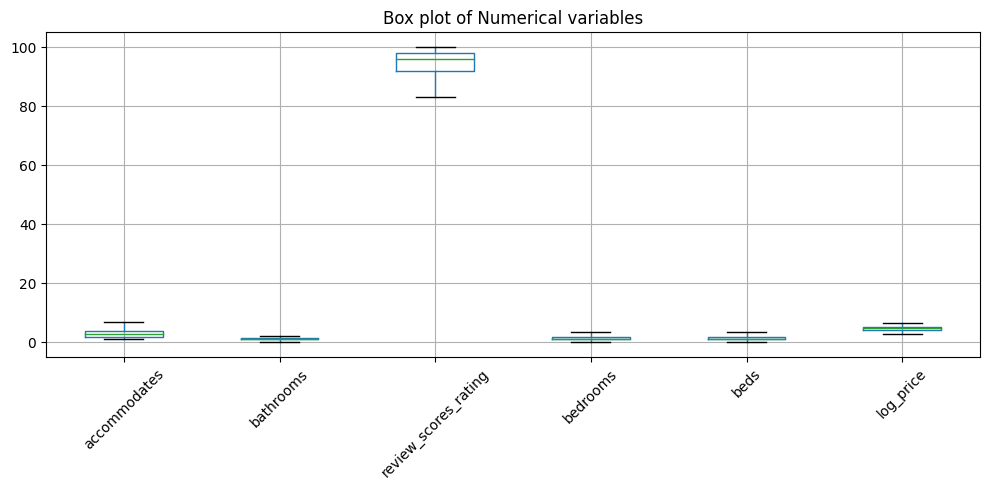

In [128]:
df[nums].boxplot(figsize=(10,5))
plt.xticks(rotation = 45)
plt.title('Box plot of Numerical variables')
plt.tight_layout()
plt.show()

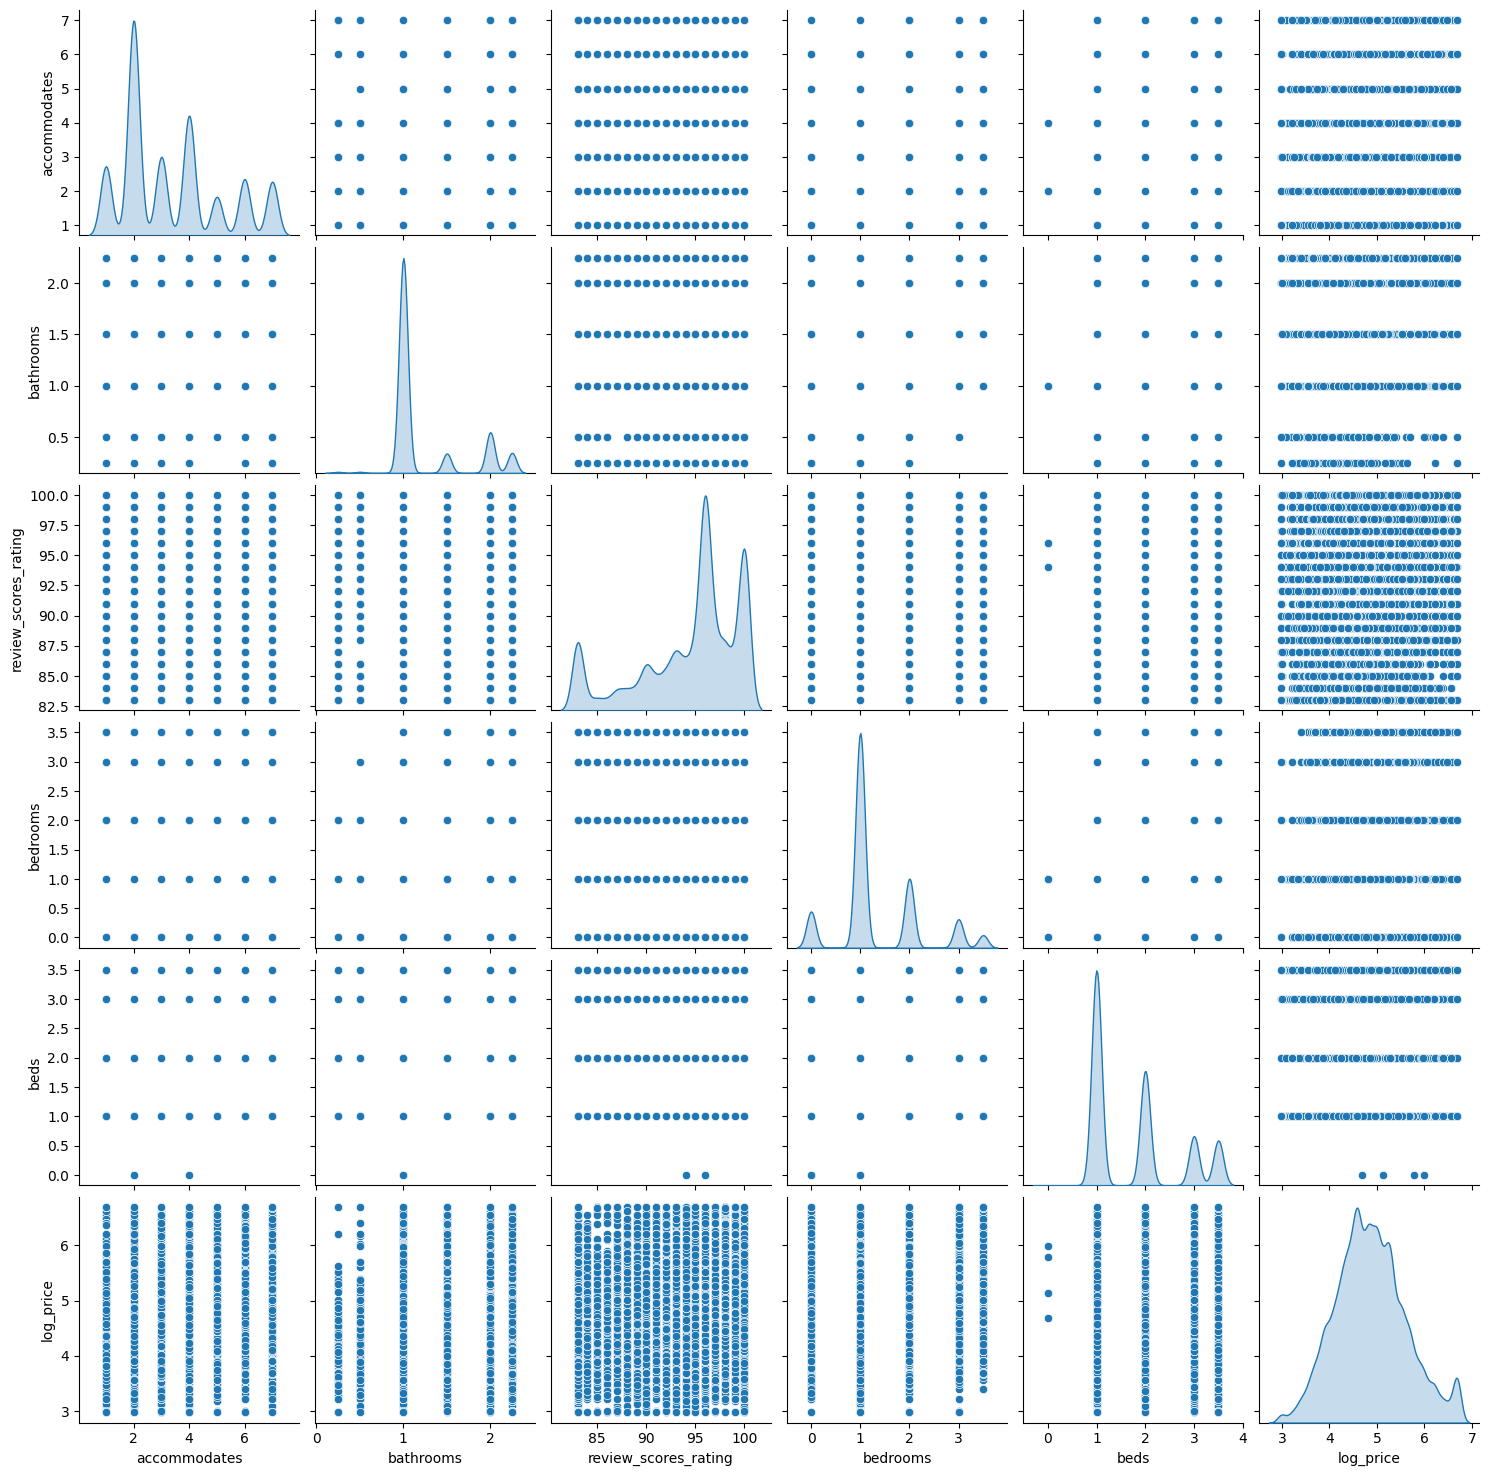

In [129]:
sns.pairplot(df[nums], diag_kind='kde')

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [131]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,96.0,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,83.0,0.0,1.0,4.744932,0,0,1,0,1,1


In [133]:
X = df.drop(columns='log_price')
y = df.log_price

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size= 0.25 , random_state= 1)

In [136]:
import statsmodels.api as sm

In [137]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [138]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     3746.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        18:51:01   Log-Likelihood:                -30177.
No. Observations:               39724   AIC:                         6.038e+04
Df Residuals:                   39712   BIC:                         6.048e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
vif1 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])], index = X_train.columns)

In [142]:
print(vif1)

const                           379.207389
accommodates                      3.987868
bathrooms                         1.483531
review_scores_rating              1.023275
bedrooms                          2.475851
beds                              3.360023
room_type_Private room            1.458786
room_type_Shared room             1.108745
cancellation_policy_moderate      1.536800
cancellation_policy_strict        1.644522
cleaning_fee_True                 1.144468
instant_bookable_True             1.014456
dtype: float64


In [144]:
X_train1 = X_train.drop(columns='accommodates')

In [145]:
model1 = sm.OLS(y_train, X_train1).fit()
print(f'r-Squared: {model1.rsquared}, adjusted_r_square: {model1.rsquared_adj}')

r-Squared: 0.4960005643467721, adjusted_r_square: 0.49587365390544225


In [146]:
(0.509 -0.49)/0.509

0.03732809430255406

In [147]:
X_train2 = X_train.drop(columns='beds')
model2 = sm.OLS(y_train, X_train2).fit()
print(f'r-Squared: {model2.rsquared}, adjusted_r_square: {model2.rsquared_adj}')
print((model2.rsquared - model.rsquared)/model.rsquared)

r-Squared: 0.508416802284199, adjusted_r_square: 0.5082930183349341
-0.0016617363456244213


In [148]:
X_train = X_train.drop(columns='beds')
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     4107.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        19:02:24   Log-Likelihood:                -30211.
No. Observations:               39724   AIC:                         6.044e+04
Df Residuals:                   39713   BIC:                         6.054e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [149]:
vif2 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])], index=X_train.columns)

In [151]:
print(vif2)

const                           378.805225
accommodates                      2.646422
bathrooms                         1.480832
review_scores_rating              1.023257
bedrooms                          2.288470
room_type_Private room            1.457210
room_type_Shared room             1.102454
cancellation_policy_moderate      1.536537
cancellation_policy_strict        1.642899
cleaning_fee_True                 1.144441
instant_bookable_True             1.014179
dtype: float64


In [152]:
X_train5 = X_train.drop(columns='cancellation_policy_strict')
model5 = sm.OLS(y_train, X_train5).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     4564.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        19:06:48   Log-Likelihood:                -30211.
No. Observations:               39724   AIC:                         6.044e+04
Df Residuals:                   39714   BIC:                         6.053e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [153]:
X_train = X_train.drop(columns='cancellation_policy_strict')
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     4564.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        19:07:57   Log-Likelihood:                -30211.
No. Observations:               39724   AIC:                         6.044e+04
Df Residuals:                   39714   BIC:                         6.053e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [154]:
df_pred = pd.DataFrame()

df_pred['actual_values'] = y_train.values.flatten()
df_pred['fitted_values'] = model.fittedvalues.values
df_pred['residuals']= model.resid.values

df_pred.head()

,actual_values,fitted_values,residuals
0,4.905275,5.243621,-0.338346
1,4.007333,4.286547,-0.279213
2,4.700480,4.262825,0.437656
3,5.298317,5.063937,0.234381
4,5.799093,4.999580,0.799512


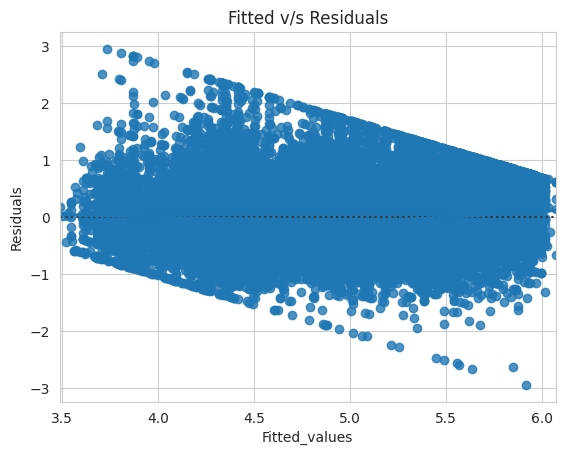

In [155]:
sns.set_style('whitegrid')
sns.residplot(data = df_pred, x = 'fitted_values', y ='residuals', lowess=True)
plt.xlabel('Fitted_values')
plt.ylabel('Residuals')
plt.title('Fitted v/s Residuals')
plt.show()

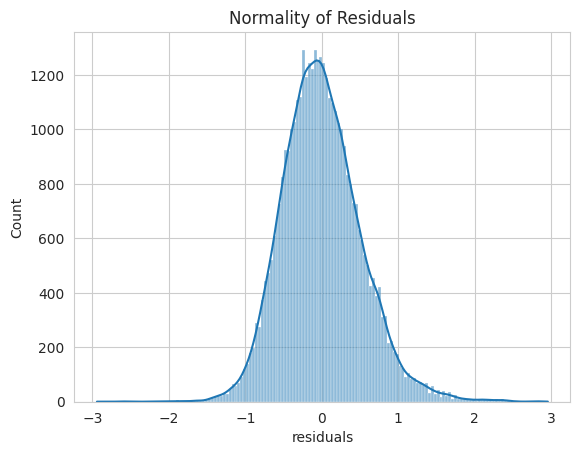

In [158]:
sns.histplot(df_pred['residuals'], kde=True)
plt.title('Normality of Residuals')
plt.show()

In [159]:
from scipy.stats import shapiro

In [161]:
print(shapiro(df_pred['residuals']))

ShapiroResult(statistic=0.9853644371032715, pvalue=0.0)


In [162]:
import pylab
import scipy.stats as stats

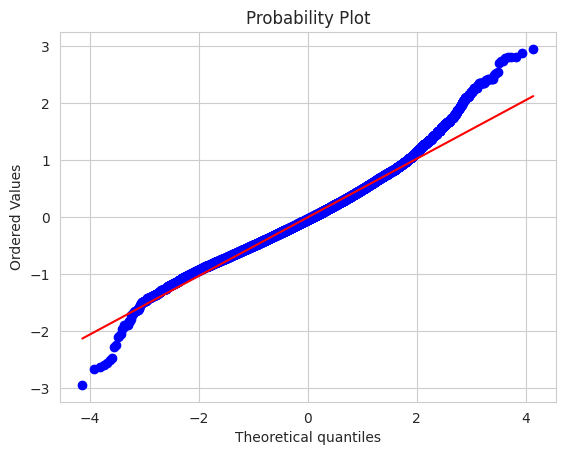

In [163]:
stats.probplot(df_pred['residuals'], dist = 'norm', plot=pylab)
plt.show()

In [164]:
import statsmodels.stats.api as sms


In [165]:
sms.het_goldfeldquandt(df_pred['residuals'], X_train)

(0.9893883074904878, 0.7738427674256039, 'increasing')

In [166]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     4564.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        19:27:39   Log-Likelihood:                -30211.
No. Observations:               39724   AIC:                         6.044e+04
Df Residuals:                   39714   BIC:                         6.053e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.1483      0.050     62.709      0.000       3.050       3.247
accommodates                     0.0803      0.002     34.375      0.000       0.076       0.085
bathrooms                        0.1800      0.007     25.500      0.000       0.166       0.194
review_scores_rating             0.0144      0.001     27.561      0.000       0.013       0.015
bedrooms                         0.1483      0.005     31.843      0.000       0.139       0.157
room_type_Private room          -0.6006      0.007    -90.540      0.000      -0.614      -0.588
room_type_Shared room           -1.0645      0.015    -71.835      0.000      -1.094      -1.036
cancellation_policy_moderate    -0.0571      0.006     -9.603      0.000      -0.069      -0.045
cleaning_fee_True               -0.0759      0.006    -12.331      0.000      -0.088      -0.064
instant_bookable_True           -0.0632      0.006    -11.078      0.000      -0.074      -0.052
==============================================================================
Omnibus:                     2333.578   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3790.083
Skew:                           0.481   Prob(JB):                         0.00
Kurtosis:                       4.167   Cond. No.                     1.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [180]:
Equation = "log_price ="
print(Equation , end=' ')
for i in range(len(X_train.columns)):
  if i == 0:
    print(model.params[i], ' + ', end=' ')
  else:
    print(model.params[i], '*', f'({X_train.columns[i]})', ' + ', end='\n')


log_price = 3.1483042395186467  +  0.08032525121343755 * (accommodates)  + 
0.1800345233385509 * (bathrooms)  + 
0.014365654877105106 * (review_scores_rating)  + 
0.14832463497315773 * (bedrooms)  + 
-0.6005793365346435 * (room_type_Private room)  + 
-1.0645467654824172 * (room_type_Shared room)  + 
-0.057051732393252494 * (cancellation_policy_moderate)  + 
-0.07590235115497611 * (cleaning_fee_True)  + 
-0.06315557822575528 * (instant_bookable_True)  + 


In [168]:
model.params

const                           3.148304
accommodates                    0.080325
bathrooms                       0.180035
review_scores_rating            0.014366
bedrooms                        0.148325
room_type_Private room         -0.600579
room_type_Shared room          -1.064547
cancellation_policy_moderate   -0.057052
cleaning_fee_True              -0.075902
instant_bookable_True          -0.063156
dtype: float64

In [181]:
X_train.columns

Index(['const', 'accommodates', 'bathrooms', 'review_scores_rating',
       'bedrooms', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cleaning_fee_True',
       'instant_bookable_True'],
      dtype='object')

In [182]:
X_test.columns

Index(['const', 'accommodates', 'bathrooms', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'instant_bookable_True'],
      dtype='object')

In [183]:
X_test.drop(columns=['beds', 'cancellation_policy_strict'], inplace= True)

In [184]:
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

In [185]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [186]:
rmse1 = np.sqrt(mean_squared_error(y_train, y_predict_train))

In [187]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_predict_test))

In [188]:
print(rmse1, rmse2)

0.5176717825313041 0.5195884266139261


In [189]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [194]:
for idx, col_name in enumerate(X_train.columns):
  print(f'the coefficient for {col_name} is {reg_model.coef_[idx]}')

the coefficient for const is 0.0
the coefficient for accommodates is 0.08032525121343724
the coefficient for bathrooms is 0.18003452333855038
the coefficient for review_scores_rating is 0.014365654877105963
the coefficient for bedrooms is 0.1483246349731564
the coefficient for room_type_Private room is -0.6005793365346441
the coefficient for room_type_Shared room is -1.0645467654824188
the coefficient for cancellation_policy_moderate is -0.0570517323932521
the coefficient for cleaning_fee_True is -0.0759023511549762
the coefficient for instant_bookable_True is -0.06315557822575499


In [195]:
intercept = reg_model.intercept_

In [196]:
print(intercept)

3.14830423951866


In [197]:
reg_model.score(X_train, y_train)

0.5084131521894812

In [199]:
reg_model.score(X_test, y_test)

0.5063047377311671

In [203]:

predicted_train=reg_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.5176717825313041

In [204]:
#RMSE on Testing data
predicted_test=reg_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.5195884266139277